<a href="https://colab.research.google.com/github/Luantrannew/uni_project/blob/main/Marketing_LN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
from sklearn.linear_model import LinearRegression

In [19]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import math

In [2]:
mkt = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTnBkgHM7FGKkJzkL8_nxNvQwzZaCh1AKqseks8DBoosYxjbREwFheMUnCU49r2QfgSXgpehJYfnm3o/pub?output=csv')

In [3]:
mkt.head(2)

,youtube,facebook,newspaper,sales,sales_label
0,276.12,45.36,83.04,26.52,high
1,53.40,47.16,54.12,12.48,medium


In [7]:
mkt.shape

(200, 5)

In [8]:
null = mkt.isnull().sum()
null

youtube        0
facebook       0
newspaper      0
sales          0
sales_label    0
dtype: int64

In [10]:
mkt.dtypes

youtube        float64
facebook       float64
newspaper      float64
sales          float64
sales_label     object
dtype: object

# Linear Regression đơn biến

<ipython-input-13-7605ff4171bd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = mkt.corr()


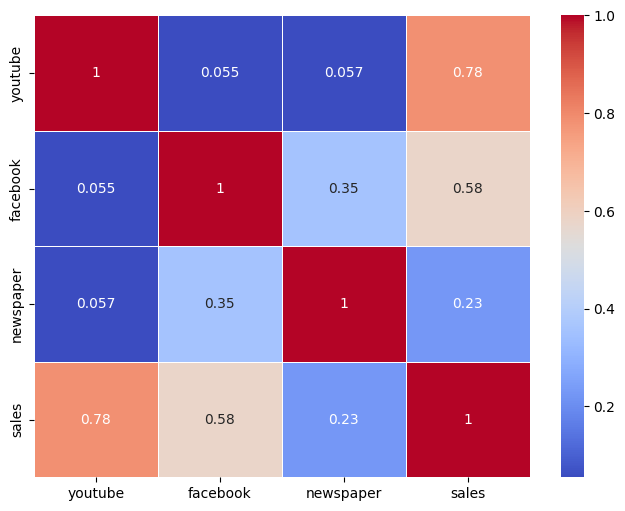

In [13]:
# Tạo ma trận tương quan
correlation_matrix = mkt.corr()
# Sử dụng seaborn để vẽ ma trận tương quan
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

In [ ]:
#chọn youtub vì nó có tương quan cao nhất so với cột sales

In [16]:
X = mkt[['youtube']]
y = mkt['sales']

In [17]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

*sales = intercept + slope × youtube*



In [18]:
print("Hệ số hồi quy (slope):", model.coef_[0])
print("Điểm bắt đầu (intercept):", model.intercept_)

Hệ số hồi quy (slope): 0.04753664043301975
Điểm bắt đầu (intercept): 8.439112258953234


In [20]:
# R-squared (R^2) - Hệ số xác định
r_squared = r2_score(y, y_pred)
print("R-squared (R^2):", r_squared)

# Mean Absolute Error (MAE) - Sai số trung bình tuyệt đối
mae = mean_absolute_error(y, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Mean Squared Error (MSE) - Sai số bình phương trung bình
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE) - Căn bậc hai của sai số bình phương trung bình
rmse = math.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared (R^2): 0.611875050850071
Mean Absolute Error (MAE): 3.0597672467129837
Mean Squared Error (MSE): 15.138220198545731
Root Mean Squared Error (RMSE): 3.8907865783856264


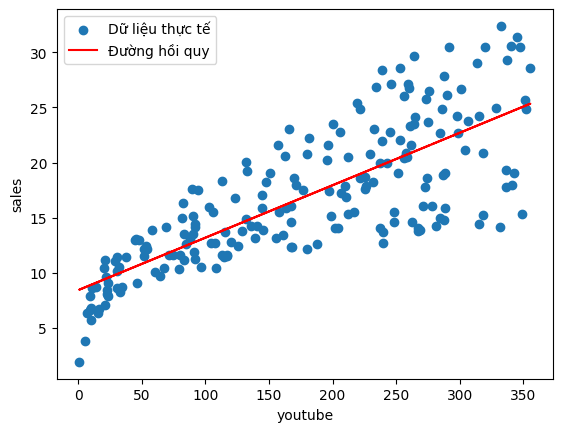

In [21]:
plt.scatter(X, y, label="Dữ liệu thực tế")
plt.plot(X, y_pred, color='red', label="Đường hồi quy")
plt.xlabel('youtube')
plt.ylabel('sales')
plt.legend()
plt.show()

# Linear regression đa bội


In [22]:
X = mkt[['youtube', 'facebook', 'newspaper']]
y = mkt['sales']

In [23]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

*sales = intercept + (slope_youtube * youtube) + (slope_facebook * facebook) + (slope_newspaper * newspaper)*

In [31]:
# In ra slope (hệ số) của mô hình
print("Slope (hệ số):", model.coef_)

# In ra intercept (điểm bắt đầu) của mô hình
print("Intercept (điểm bắt đầu):", model.intercept_)

Slope (hệ số): [ 0.04576465  0.18853002 -0.00103749]
Intercept (điểm bắt đầu): 3.5266672433512944


In [24]:
# R-squared (R^2) - Hệ số xác định
r_squared = r2_score(y, y_pred)
print("R-squared (R^2):", r_squared)

# Mean Absolute Error (MAE) - Sai số trung bình tuyệt đối
mae = mean_absolute_error(y, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Mean Squared Error (MSE) - Sai số bình phương trung bình
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE) - Căn bậc hai của sai số bình phương trung bình
rmse = math.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared (R^2): 0.8972106381789521
Mean Absolute Error (MAE): 1.502413475624482
Mean Squared Error (MSE): 4.009141892895749
Root Mean Squared Error (RMSE): 2.002284168867084


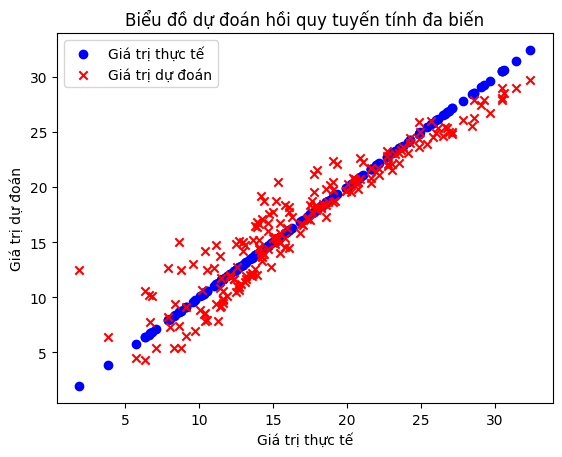

In [30]:
plt.scatter(y, y, c='b', label='Giá trị thực tế', marker='o')  # Màu xanh cho giá trị thực tế
plt.scatter(y, y_pred, c='r', label='Giá trị dự đoán', marker='x')  # Màu đỏ cho giá trị dự đoán

plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.title('Biểu đồ dự đoán hồi quy tuyến tính đa biến')
plt.legend()
plt.show()